-----
## Objective:
### To built a machine learning model to identify and predict potential customers likely to buy the newly introduced travel package.

## Import the Libraries

In [1]:
#Pandas for data manipulation
import pandas as pd  
#Numpy for mathematical operations
import numpy as np


#Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#classifiers to train models
from sklearn.tree import DecisionTreeClassifier      #Decision Tree model
from sklearn.ensemble import RandomForestClassifier  #Bagging model
from xgboost import XGBClassifier                    #Boosting model

#Metric for model evaluation
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file
customer = pd.read_excel('Tourism.xlsx', sheet_name=1)

In [3]:
#Displaying the first 5 rows in the dataframe
customer.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
records = customer.shape
print('There are {} number of rows and {} number of columns.'.format(records[0],records[1]))

There are 4888 number of rows and 20 number of columns.


In [5]:
#Features of the dataset
customer.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
#basic information of the Customer Dataframe
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Observations
#### 1. There are missing values in various columns.
#### 2. The datatype of categorical variables are wrong.

In [7]:
#Datatypes of the features
customer.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

### Observation
#### The datatypes of the features 'ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 
#### 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation' needs to be converted to the category datatype.    

In [8]:
#Converting the datatypes to category
columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus','Passport', 'OwnCar', 'Designation' ]

customer[columns] = customer[columns].astype('category')

In [9]:
customer.dtypes

CustomerID                     int64
ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar       category
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [10]:
customer.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Observations
#### 1. There are 10 categorical features namely:
#### 'ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched','MaritalStatus','Passport', 'OwnCar', 'Designation'

#### 2. There are 10 numerical features namely:
#### CustomerID, Age, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, 
#### PitchSatisfactionScore, NumberOfChildrenVisiting, MonthlyIncome
#### 3. ProdTaken is the Target variable.


## Descriptive Statistics

### Descriptive Statistics of numerical features

In [11]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


### Observations
#### 1. There are missing values in the column 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', NumberOfChildrenVisiting', 'MonthlyIncome'
#### 2. Age,  DurationOfPitch,  NumberOfPersonVisiting - are following a Normal Distribution. 

### Descriptive Statistics of categorical features

In [12]:
customer.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032


### Observations
#### 1. Basic package is the  most highly pitched product.
#### 2. Most common type of contact is Self enquiry.
#### 3. Majority of the customers in the dataset works as an Executive.

## Missing Values

In [13]:
customer.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

#### There are missing values in the following features:
#### DurationOfPitch             
#### MonthlyIncome               
#### Age
#### NumberOfTrips
#### NumberOfChildrenVisiting     
#### NumberOfFollowups            
#### PreferredPropertyStar        
#### TypeofContact                

In [14]:
print(round((customer.isnull().sum()/customer.isnull().count())*100,2).sort_values(ascending = False))

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Passport                    0.00
MaritalStatus               0.00
ProductPitched              0.00
Designation                 0.00
NumberOfPersonVisiting      0.00
Gender                      0.00
Occupation                  0.00
PitchSatisfactionScore      0.00
CityTier                    0.00
OwnCar                      0.00
ProdTaken                   0.00
CustomerID                  0.00
dtype: float64


**Missing values are 5% and below. So, we can drop those null values**

In [15]:
#Drop the null values
customer.dropna(inplace = True)

In [16]:
customer.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**There are no null values in the dataframe.**

## Exploring the categorical features

In [17]:
#Unique values in every categorical features
for k,v in customer.dtypes.items():
    if v == 'category':
        
        unique_val = customer[k].value_counts()
        print('Unique value of the {}: \n*******************************\n{}\n\n'.format(k,unique_val))

Unique value of the ProdTaken: 
*******************************
0    3331
1     797
Name: ProdTaken, dtype: int64


Unique value of the TypeofContact: 
*******************************
Self Enquiry       2918
Company Invited    1210
Name: TypeofContact, dtype: int64


Unique value of the CityTier: 
*******************************
1    2678
3    1288
2     162
Name: CityTier, dtype: int64


Unique value of the Occupation: 
*******************************
Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: Occupation, dtype: int64


Unique value of the Gender: 
*******************************
Male       2463
Female     1510
Fe Male     155
Name: Gender, dtype: int64


Unique value of the ProductPitched: 
*******************************
Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64


Unique value of the PreferredPropertyStar: 
*************************

### Observations
#### 1. The Target variable has 3331 records in class 0 and 797 records in class 1. Hence, it is an imbalanced dataset.
#### 2. Self Enquiry is the most preferred type of contact.
#### 3. The feature 'Gender' has three unique values 'Male', 'Female', and 'Fe Male'. This may be due to the typing error.
#### 4. Majority of customers has given a rating of 3 to the preferred hotel.
#### 5. Freelancer is very less, say 2 records compared to other types of occupation.
#### 6. Most of the customers are working as Executives and few as VP.

### Correcting the data entry issue where 'Female' was entered as 'Fe Male'

In [18]:
#Fe Male to Female
customer['Gender'] = customer['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [19]:
customer.Gender.value_counts()

Male      2463
Female    1665
Name: Gender, dtype: int64

**The data entry issue has been resolved and there are only two unique values for 'Gender' feature.**

In [20]:
#dropping the customerId
customer.drop(columns = 'CustomerID', inplace = True)

----
## Exploratory Data Analysis

## Univariate Analysis (Central Tendency, Dispersion)

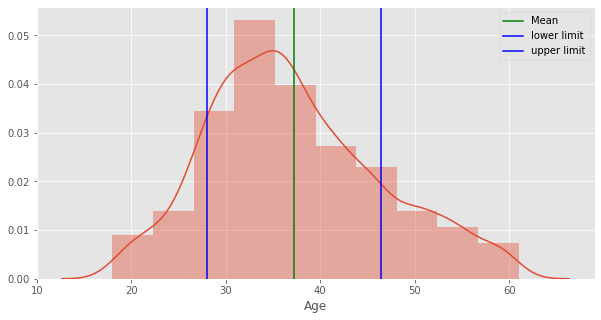

In [21]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
mean = customer['Age'].mean()
one_dev = customer['Age'].std()

sns.distplot(customer['Age'], bins=10, kde=True)

plt.axvline(mean, color='green', label='Mean')
plt.axvline(mean-one_dev, color='blue', label='lower limit')
plt.axvline(mean+one_dev, color='blue', label='upper limit')

plt.legend()

###### The green vertical line tells that mean of the Age is around 38 and the two blue vertical lines are 1 standard deviation away from the mean.

In [22]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

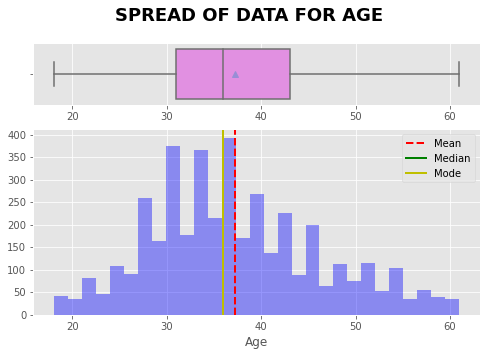

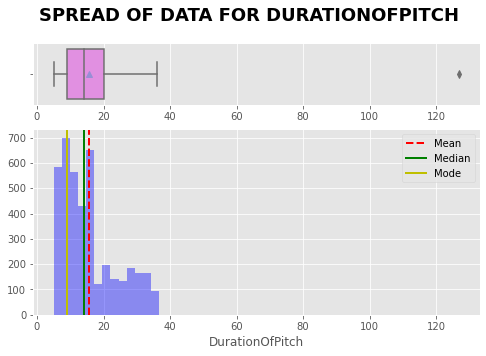

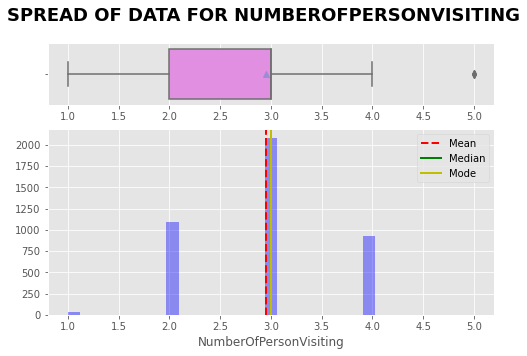

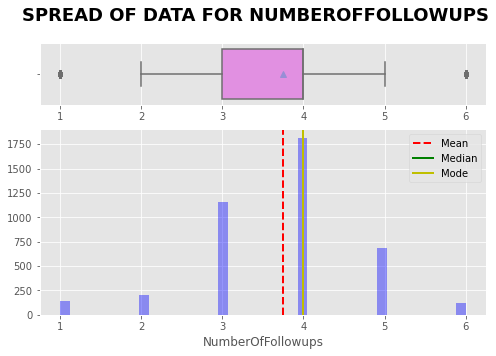

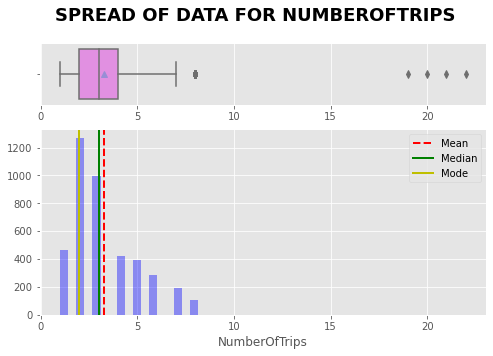

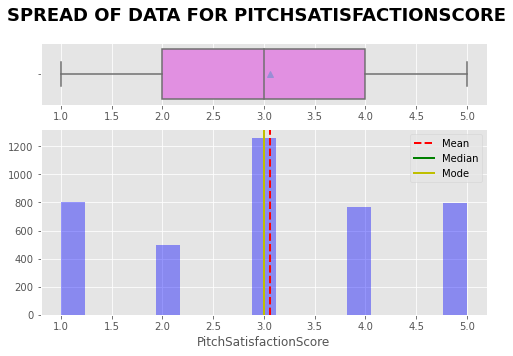

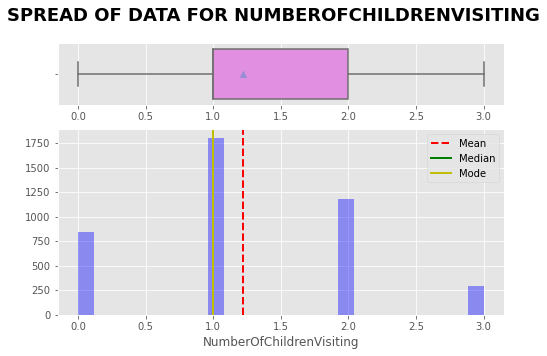

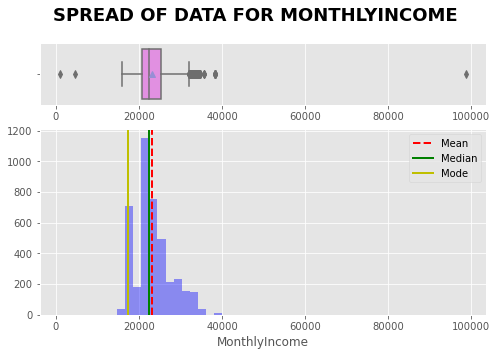

In [23]:
#select all quantitative columns for checking the spread
col_list=  customer.select_dtypes([np.number]).columns
for i in range(len(col_list)):
    dist_box(customer[col_list[i]])

### Observations

#### Age of customer lies approximately between 18 - 62 . Average age is around 38. Majority of customers are in the range of 36-38.


###### DurationofPitch distribution is right skewed. 
###### Most of the customers have minimum 1 children visiting.
###### MonthlyIncome is normally distributed and Average monthly income of customer is 22000. There are lot of outliers at upper end.

In [24]:
#Customers based on the city tier
customer.CityTier.value_counts()

1    2678
3    1288
2     162
Name: CityTier, dtype: int64

#### Most of the customers whio have contacted the tour company is from the City Tier 1 followed by City Tier 3.

In [25]:
#Average incone of each tier
s= customer.groupby(['CityTier'])['MonthlyIncome'].mean().reset_index().sort_values(by='MonthlyIncome',ascending=False)
s.style.background_gradient(cmap='Purples')

,CityTier,MonthlyIncome
2,3,23820.432453
0,1,22907.311800
1,2,22556.802469


#### The average monthly income of customers from City Tier 3 is greater than Tier 1 followed by Tier 2.

In [26]:
#Preferred Property star based on the level of occupation
ratings = customer.groupby(['PreferredPropertyStar', 'Occupation']).size().reset_index().rename(columns = {0:'Rating Count'})
ratings

,PreferredPropertyStar,Occupation,Rating Count
0,3.0,Free Lancer,2
1,3.0,Large Business,225
2,3.0,Salaried,1270
3,3.0,Small Business,1044
4,4.0,Free Lancer,0
5,4.0,Large Business,81
6,4.0,Salaried,345
7,4.0,Small Business,360
8,5.0,Free Lancer,0
9,5.0,Large Business,75


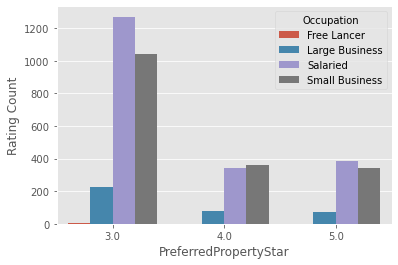

In [27]:
sns.barplot(x = 'PreferredPropertyStar', y = 'Rating Count', data = ratings, hue = 'Occupation')

**Salaried people prefer 3 star and very few freelancers**

In [28]:
product = customer.ProductPitched.value_counts().index.categories
product

Index(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'], dtype='object')

In [29]:
x = customer.ProductPitched.value_counts().values
x

array([1615, 1422,  737,  250,  104], dtype=int64)

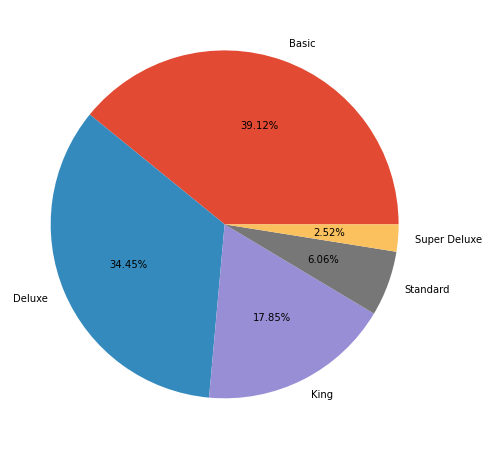

In [30]:
#Pie Chart - to see the distribution of the product pitched
plt.figure(figsize=(10,8))
plt.pie(x, labels = product, autopct = '%1.2f%%')
plt.show()

#### Basic followed by Deluxe

### Exploring the monthly income

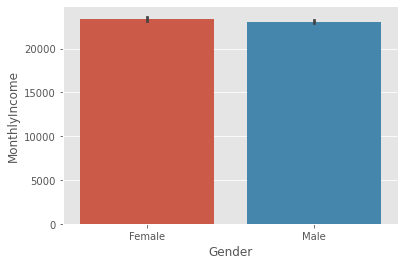

In [31]:
sns.barplot(x = 'Gender', y = 'MonthlyIncome', data = customer)

#### Similar

## Density Plot

### Distribution of Monthly Income of Customers who bought and did not buy the package

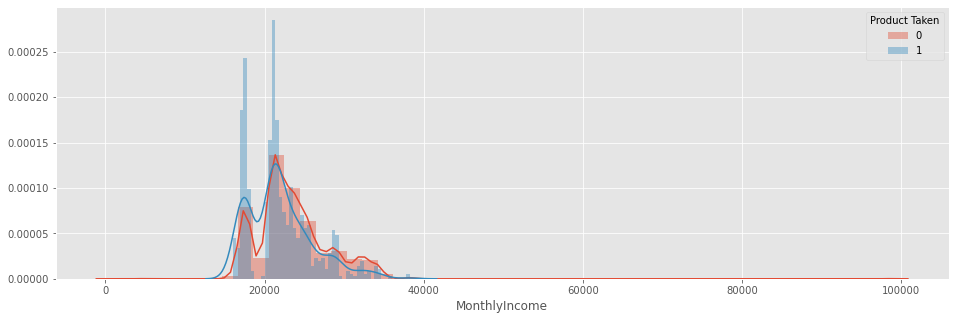

In [32]:
fig, ax = plt.subplots(figsize=(16,5))
sns.distplot(a=customer[customer['ProdTaken']==0]['MonthlyIncome'], bins=50)
sns.distplot(a=customer[customer['ProdTaken']==1]['MonthlyIncome'], bins=50)
plt.legend(title="Product Taken", loc='upper right', labels = ['0', '1'])
plt.show()

###### From the above plot, we can see that the monthly income of customers were similarly distributed with some outliers who did not buy the package

In [33]:
#Monthly Income By ProductPitched
customer.groupby(['ProductPitched'])['MonthlyIncome'].mean().reset_index().sort_values(by='MonthlyIncome',ascending=False)

,ProductPitched,MonthlyIncome
2,King,34119.942308
4,Super Deluxe,30971.696000
3,Standard,26617.531886
1,Deluxe,22942.593530
0,Basic,19905.766563


#### Customers with highly average income booked King suites whereas the least income earners booked basic suite.

## Customer Profiling

In [34]:
#Customer Profiling
customer_profile = customer[customer['ProdTaken'] == 1]

In [35]:
#Age vs Product Pitched
customer_profile.groupby(['ProductPitched'])['Age'].mean().reset_index().sort_values(by='Age',ascending=False)

,ProductPitched,Age
4,Super Deluxe,43.368421
2,King,42.444444
3,Standard,40.739496
1,Deluxe,37.624242
0,Basic,31.125773


In [36]:
#Monthly Income vs Product Pitched
customer_profile.groupby(['ProductPitched'])['MonthlyIncome'].mean().reset_index().sort_values(by='MonthlyIncome',ascending=False)

,ProductPitched,MonthlyIncome
2,King,31840.444444
4,Super Deluxe,29419.684211
3,Standard,25884.899160
1,Deluxe,23319.327273
0,Basic,20039.088660


Text(0.5, 1.0, 'TypeofContact vs Product Pitched')

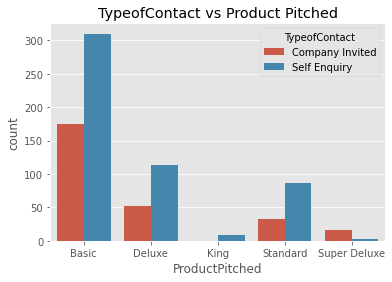

In [37]:
sns.countplot(x='ProductPitched', data = customer_profile, hue = 'TypeofContact').set_title('TypeofContact vs Product Pitched')

Text(0.5, 1.0, 'MaritalStatus vs Product Pitched')

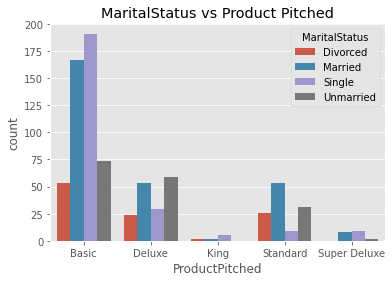

In [38]:
sns.countplot(x='ProductPitched', data = customer_profile, hue = 'MaritalStatus').set_title('MaritalStatus vs Product Pitched')

Text(0.5, 1.0, 'Gender vs Product Pitched')

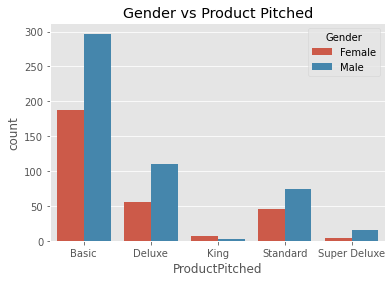

In [39]:
sns.countplot(x='ProductPitched', data = customer_profile, hue = 'Gender').set_title('Gender vs Product Pitched')

Text(0.5, 1.0, 'Occupation vs Product Pitched')

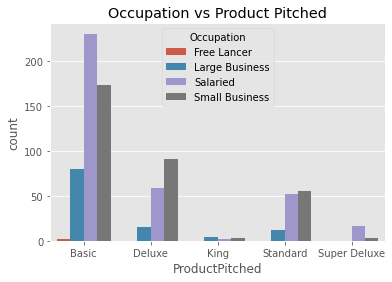

In [40]:
sns.countplot(x='ProductPitched', data = customer_profile, hue = 'Occupation').set_title('Occupation vs Product Pitched')

Text(0.5, 1.0, 'PitchSatisfactionScore vs Product Pitched')

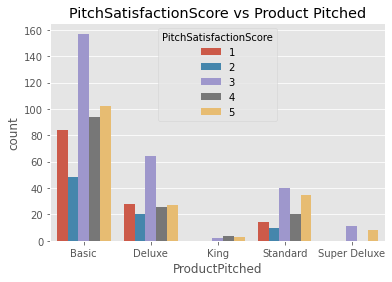

In [41]:
sns.countplot(x='ProductPitched', data = customer_profile, hue = 'PitchSatisfactionScore').set_title('PitchSatisfactionScore vs Product Pitched')

## ProdTaken and ProductPitched
##### Basic - The customers who purchased this package were mostly males and the average earning income is in the range of 15000 - 20000. Their age is between 25 and 31 and are salaried working as an Executive. Customers who were single preferred this package and they approached the company through self enquiry and are from city tier 1.
##### Standard - Monthly income of the customers is between 25000 and 30000, Age is between 38 and 41. Married couples has high interests in this package. The customers included both salaried and small business people.
##### Deluxe - Monthly income is between 20000 and 25000, Age is between 31 and 38. Customers with small business and unmarried form city tier 3 bought this package. 
##### Super Deluxe - Monthly income is around 30000, Age is between 41 and 44. Majority of the customers were company invited.
##### King - Monthly income is between 30000 and 35000, Age is between 45 and 50. The number of customers who purchased this package is very less compared to other packages. The customers included from all categories of occupation, except freelancer. 

## Exploring the Target variable
### Count plot

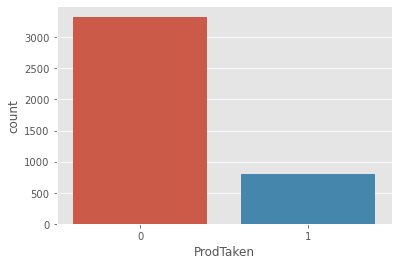

In [42]:
sns.countplot(customer['ProdTaken'])

#### From the above count plot we can deduce that only around 20% of customers have purchased the tourism package.

In [43]:
def count_plot(plot, feature):
    '''This function is used to annotate the percentage on the count plot'''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [44]:
customer.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

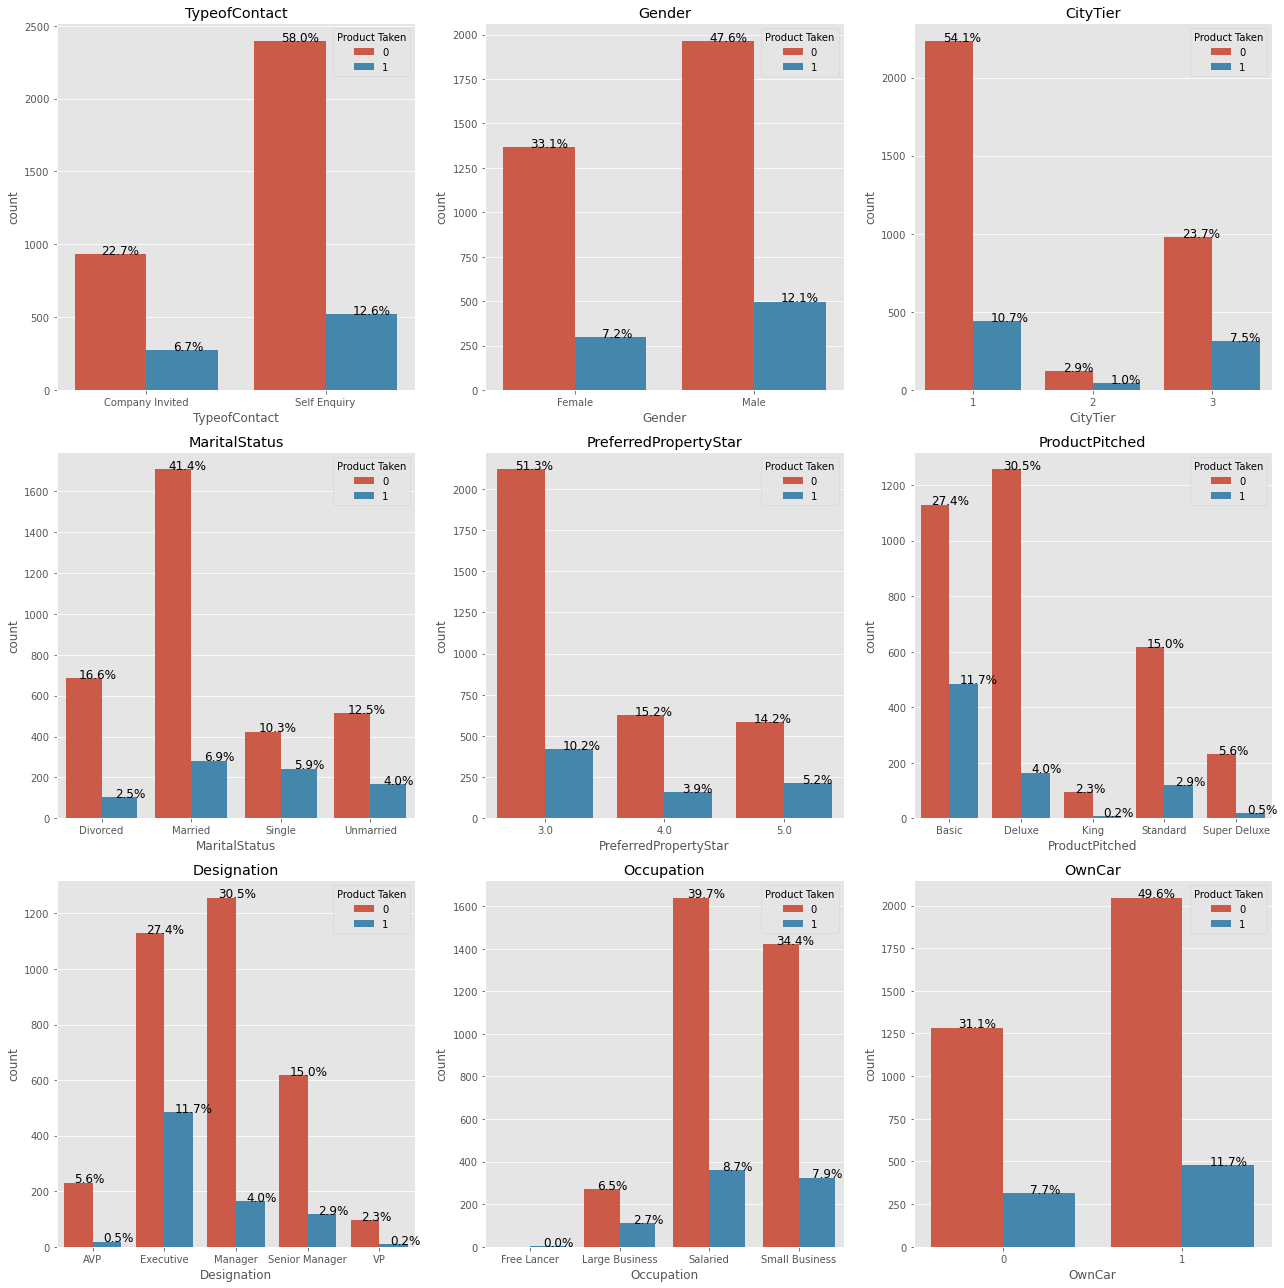

In [45]:
cols = ['TypeofContact', 'Gender','CityTier','MaritalStatus', 'PreferredPropertyStar', 'ProductPitched',
       'Designation', 'Occupation', 'OwnCar'
       ]
n_rows = 3
n_cols = 3
# The subplot grid and the figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6,n_rows*6))

# for loop to create countplots for the categorical varibles
for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(customer[cols[i]], hue=customer["ProdTaken"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Product Taken", loc='upper right') 
        count_plot(ax,customer[cols[i]])
plt.tight_layout() 

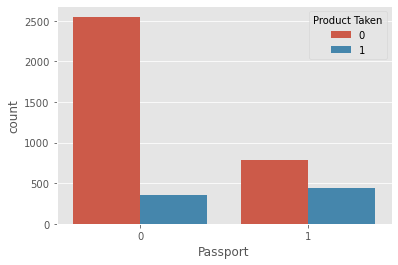

In [46]:
sns.countplot(customer['Passport'], hue=customer["ProdTaken"])
plt.legend(title="Product Taken", loc='upper right') 
plt.show()

### Observations:
#### 1. Majority of customers who were invited by the companies had higher chances of buying the package compared to those who
#### self-inquired.
#### 2. Male customers high
#### 3. Very few customers from City tier 1 purchased the package. Majority of them belonged to City tier 3.
#### 4. Both single and unmarried customers were interested and bought the packages.
#### 5. Customer mostly prefer 5 star rating property.
#### 6. Basic package was the mostly pitched property whereas the King the least pitched.
#### 7. Majority of customers who bought the packages work as Executives.


## Correlation Matrix

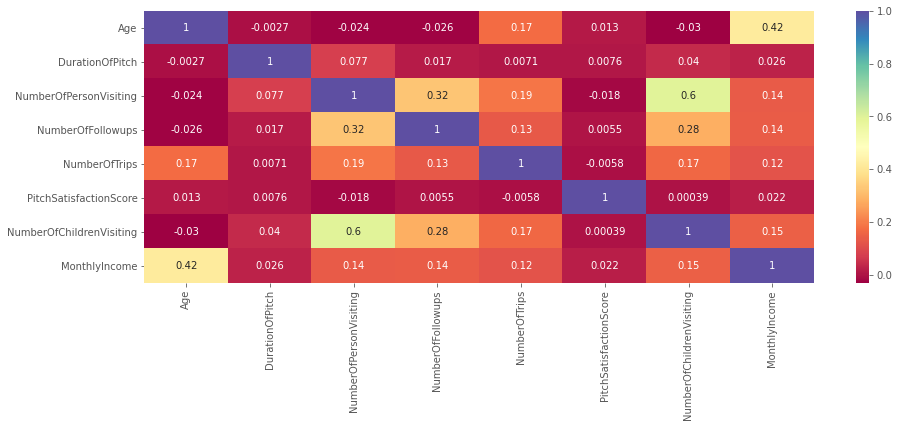

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(customer.corr(),annot=True ,cmap="Spectral" )
plt.show()

### Observations

#### 1. The attributes 'NumberOfChildrenVisiting' and 'NumberOfTrips' has the highest correlation of 0.6
#### 2. The attributes 'MonthyIncome' and 'Age' has the positive correlation of 0.47
#### 3. There is a negative correlation between 'Age' and 'DurationOfPitch'

## Box Plot
### Visualising the ouliers 

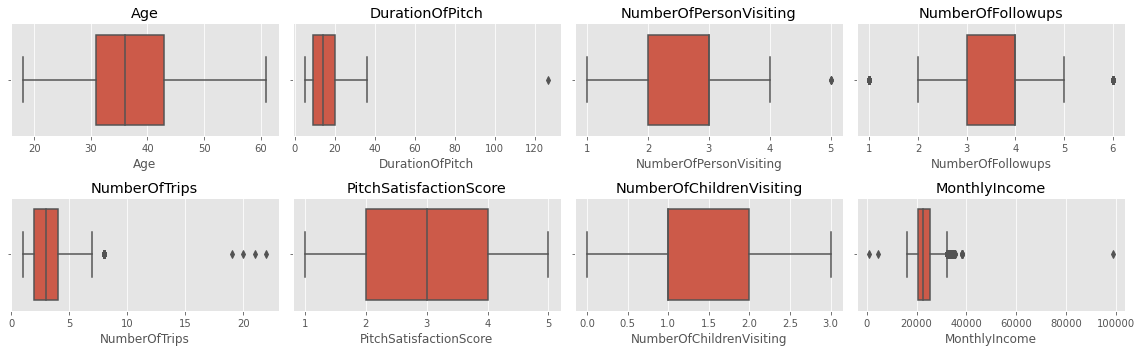

In [48]:
#col_list
fig, axs = plt.subplots(2,4,figsize=(16,5))
#sns.boxplot( y=df["sepal_length"] )
for r in range(0,2):
    for c in range(0,4):  
        
        i = r*4+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.boxplot(x = customer[col_list[i]], ax=ax)
        ax.set_title(col_list[i])

plt.tight_layout()

### Observations
#### Outliers are seen in the below independent features:
##### DurationOfPitch
##### NumberOfPersonVisiting
##### NumberOfFollowups
##### NumberOfTrips
##### MonthlyIncome

## Outlier Treatment

In [49]:
customer.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [50]:
customer.MonthlyIncome.describe()

count     4128.000000
mean     23178.464147
std       4506.614622
min       1000.000000
25%      20751.000000
50%      22418.000000
75%      25301.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [51]:
outliers = customer[(customer['DurationOfPitch'] > 40) | (customer['NumberOfTrips'] > 15) | (customer['MonthlyIncome'] > 90000) | (customer['MonthlyIncome'] < 10000)]

In [52]:
customer.shape

(4128, 19)

In [53]:
outliers.shape

(8, 19)

In [54]:
df = customer.drop(outliers.index)

In [55]:
df.shape

(4120, 19)

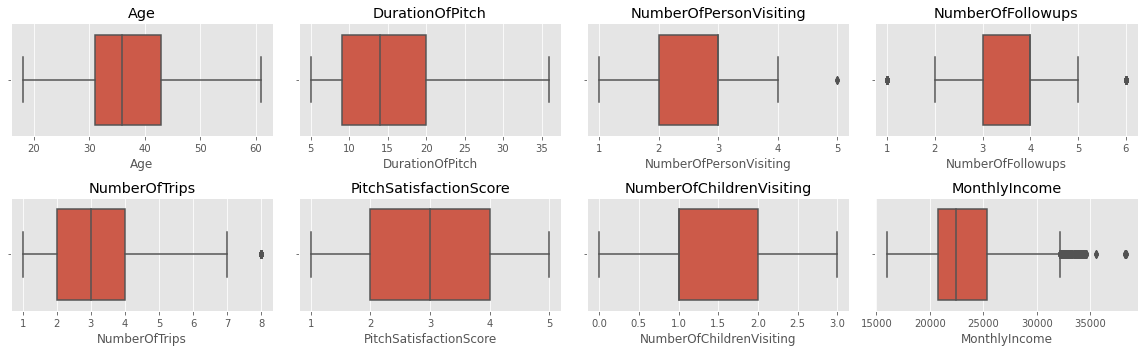

In [56]:
#col_list
fig, axs = plt.subplots(2,4,figsize=(16,5))
#sns.boxplot( y=df["sepal_length"] )
for r in range(0,2):
    for c in range(0,4):  
        
        i = r*4+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.boxplot(x = df[col_list[i]], ax=ax)
        ax.set_title(col_list[i])

plt.tight_layout()

### Since we are required to create a model to predict the potential customers who will buy the new tourism package, we will drop all the columns realted to customer interaction.

In [57]:
#drop the columns
df.drop(['PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch'], axis = 1, inplace = True)

In [58]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0


In [59]:
X = df.drop(['ProdTaken'], axis = 1)
Y = df['ProdTaken']

In [60]:
X = pd.get_dummies(X)

In [98]:
X.head().T

,0,1,2,3,5
Age,41.0,49.0,37.0,33.0,32.0
NumberOfPersonVisiting,3.0,3.0,3.0,2.0,3.0
NumberOfTrips,1.0,2.0,7.0,2.0,1.0
NumberOfChildrenVisiting,0.0,2.0,0.0,1.0,1.0
MonthlyIncome,20993.0,20130.0,17090.0,17909.0,18068.0
TypeofContact_Company Invited,0.0,1.0,0.0,1.0,1.0
TypeofContact_Self Enquiry,1.0,0.0,1.0,0.0,0.0
CityTier_1,0.0,1.0,1.0,1.0,1.0
CityTier_2,0.0,0.0,0.0,0.0,0.0
CityTier_3,1.0,0.0,0.0,0.0,0.0


## train_test_split 

In [62]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state = 1, stratify = Y)

In [63]:
#Shapes of the train and test dataset
print('Number of records in the training dataset: {}\nNumber of records in the testing dataset: {}'.format(str(x_train.shape[0]),str(x_test.shape[0])))

Number of records in the training dataset: 2884
Number of records in the testing dataset: 1236


In [64]:
y_train.value_counts()

0    2328
1     556
Name: ProdTaken, dtype: int64

#### The distibution of class 0 is very high compared to that of class 1. Hence, there is imbalance in the dataset

### Handling the Imbalanced dataset

In [65]:
#from imblearn.over_sampling import SMOTE

In [66]:
#oversample = SMOTE()
#x_train, y_train = oversample.fit_resample(x_train, y_train)

In [67]:
#y_train.value_counts()

## Model Building

### Decision Tree

In [68]:
dtree = DecisionTreeClassifier(random_state = 1, class_weight={0:0.20, 1:0.80})
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [69]:
y_train_pred = dtree.predict(x_train)
y_test_pred_dt = dtree.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
accuracy_score_dt = accuracy_score(y_test, y_test_pred_dt)
print('The training accuracy is', train_accuracy_dt)
print('The test accuracy is', accuracy_score_dt)

The training accuracy is 1.0
The test accuracy is 0.8818770226537217


###### The high training accuracy and low test accuracy indicates overfitting.

## Evaluating the model
### Classification report 

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       997
           1       0.70      0.68      0.69       239

    accuracy                           0.88      1236
   macro avg       0.81      0.80      0.81      1236
weighted avg       0.88      0.88      0.88      1236



In [72]:
recall_score_dt = round(recall_score(y_test, y_test_pred_dt),2)
precision_score_dt = round(recall_score(y_test, y_test_pred_dt),2)

## Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,y_test_pred_dt)
confusionMatrix

array([[928,  69],
       [ 77, 162]], dtype=int64)

Text(51.0, 0.5, 'Truth')

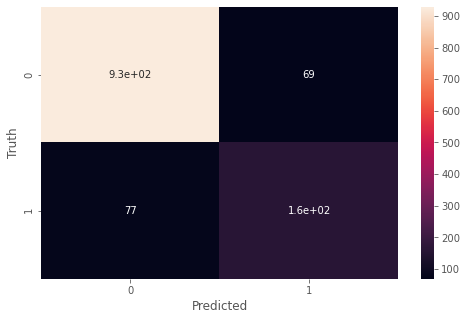

In [74]:
plt.figure(figsize = (8,5))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Random Forest

In [75]:
rforest = RandomForestClassifier(n_estimators=100, random_state = 1,class_weight={0:0.20, 1:0.80})
rforest.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [76]:
y_train_pred_rf = rforest.predict(x_train)
y_test_pred_rf = rforest.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_score_rf = accuracy_score(y_test, y_test_pred_rf)
print('The training accuracy is', train_accuracy_rf)
print('The test accuracy is', accuracy_score_rf)

The training accuracy is 1.0
The test accuracy is 0.8996763754045307


###### There is an improvement in the testing accuracy and but still there is overfitting.

## Evaluating the model
### Classification report 

In [78]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       997
           1       0.92      0.53      0.67       239

    accuracy                           0.90      1236
   macro avg       0.91      0.76      0.81      1236
weighted avg       0.90      0.90      0.89      1236



#### The recall value for the class is very less

In [79]:
recall_score_rf = round(recall_score(y_test, y_test_pred_rf),2)
precision_score_rf = round(recall_score(y_test, y_test_pred_rf),2)

## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,y_test_pred_rf)
confusionMatrix

array([[986,  11],
       [113, 126]], dtype=int64)

#### The false negative of this model is very high comapred to that of the decision tree model.

Text(51.0, 0.5, 'Truth')

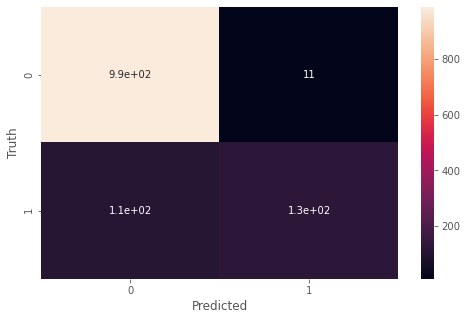

In [81]:
plt.figure(figsize = (8,5))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## XGBOOST Model

In [82]:
xgb = XGBClassifier(n_estimators = 100, random_state = 1,eval_metric='logloss', scale_pos_weight = 4)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

In [84]:
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_test_pred_xgb)
print('The training accuracy is', train_accuracy_xgb)
print('The test accuracy is', accuracy_score_xgb)

The training accuracy is 0.9996532593619972
The test accuracy is 0.9182847896440129


## Evaluating the model
### Classification report 

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       997
           1       0.83      0.72      0.77       239

    accuracy                           0.92      1236
   macro avg       0.88      0.84      0.86      1236
weighted avg       0.92      0.92      0.92      1236



In [86]:
recall_score_xgb = round(recall_score(y_test, y_test_pred_xgb),2)
precision_score_xgb = round(recall_score(y_test, y_test_pred_xgb),2)

## Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,y_test_pred_xgb)
confusionMatrix

array([[963,  34],
       [ 67, 172]], dtype=int64)

Text(51.0, 0.5, 'Truth')

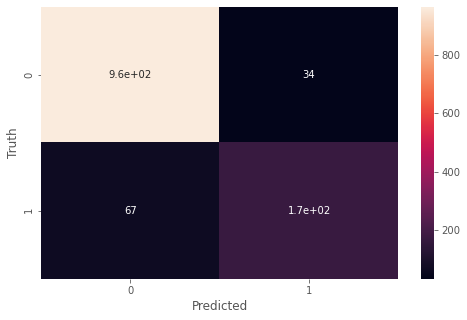

In [88]:
plt.figure(figsize = (8,5))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [89]:
models = [('Decision Tree', train_accuracy_dt, accuracy_score_dt,recall_score_dt, precision_score_dt),
          ('Random Forest', train_accuracy_rf,accuracy_score_rf,recall_score_rf, precision_score_rf),
          ('XGBoost', train_accuracy_xgb, accuracy_score_xgb,recall_score_xgb, precision_score_xgb)]

In [90]:
comaprison_table = pd.DataFrame(data = models, columns=['Model', 'TRAIN_ACCURACY', 'TEST_ACCURACY', 'RECALL', 'PRECISION'])
comaprison_table.sort_values(by = ['TEST_ACCURACY'], ascending = False)

,Model,TRAIN_ACCURACY,TEST_ACCURACY,RECALL,PRECISION
2,XGBoost,0.999653,0.918285,0.72,0.72
1,Random Forest,1.000000,0.899676,0.53,0.53
0,Decision Tree,1.000000,0.881877,0.68,0.68


### From the above comaprison table, we can see that the XGBoost model has the highest recall of 0.72 and gives less false negative compared to other models. In addition, there is no overfitting in the model and gives an accuracy of 91.83%

## Feature Importance

### Decision Tree

In [91]:
feature_names = x_train.columns

In [92]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = feature_names).sort_values(by = 'Imp', ascending = False))

                                    Imp
Age                            0.209272
MonthlyIncome                  0.151815
Passport_1                     0.092042
NumberOfTrips                  0.090309
Designation_Executive          0.044682
CityTier_3                     0.038702
PreferredPropertyStar_5.0      0.030023
Occupation_Small Business      0.024755
MaritalStatus_Married          0.024593
Gender_Male                    0.024148
NumberOfPersonVisiting         0.021828
Designation_Senior Manager     0.020343
MaritalStatus_Divorced         0.020177
Occupation_Large Business      0.019057
TypeofContact_Self Enquiry     0.018466
NumberOfChildrenVisiting       0.018282
Gender_Female                  0.018170
TypeofContact_Company Invited  0.018033
PreferredPropertyStar_3.0      0.016447
PreferredPropertyStar_4.0      0.013957
Occupation_Salaried            0.013794
CityTier_1                     0.012520
OwnCar_1                       0.011464
OwnCar_0                       0.010063


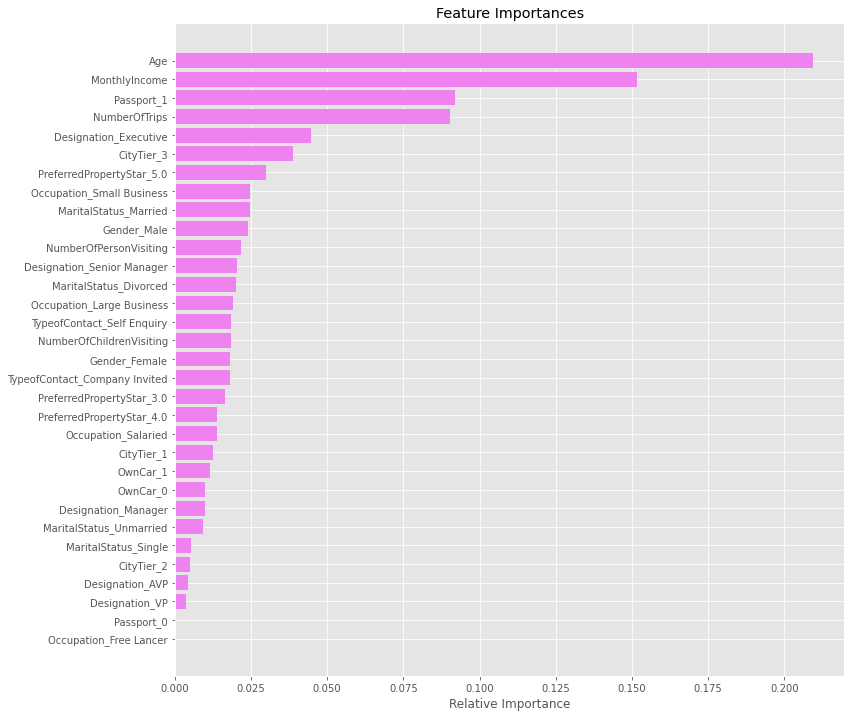

In [93]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest

In [94]:
importances = rforest.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rforest.feature_importances_, columns = ["Imp"], index = feature_names).sort_values(by = 'Imp', ascending = False))

                                    Imp
Age                            0.141674
MonthlyIncome                  0.134002
NumberOfTrips                  0.076785
Passport_1                     0.047489
Passport_0                     0.047403
Designation_Executive          0.042020
NumberOfChildrenVisiting       0.040138
NumberOfPersonVisiting         0.033398
CityTier_1                     0.025648
Occupation_Small Business      0.025459
MaritalStatus_Married          0.024836
Occupation_Salaried            0.023222
CityTier_3                     0.023141
PreferredPropertyStar_3.0      0.022630
Designation_Manager            0.022276
PreferredPropertyStar_5.0      0.022204
TypeofContact_Self Enquiry     0.021649
Gender_Female                  0.021394
MaritalStatus_Single           0.021293
Gender_Male                    0.021199
TypeofContact_Company Invited  0.021170
OwnCar_1                       0.019525
OwnCar_0                       0.019175
PreferredPropertyStar_4.0      0.018274


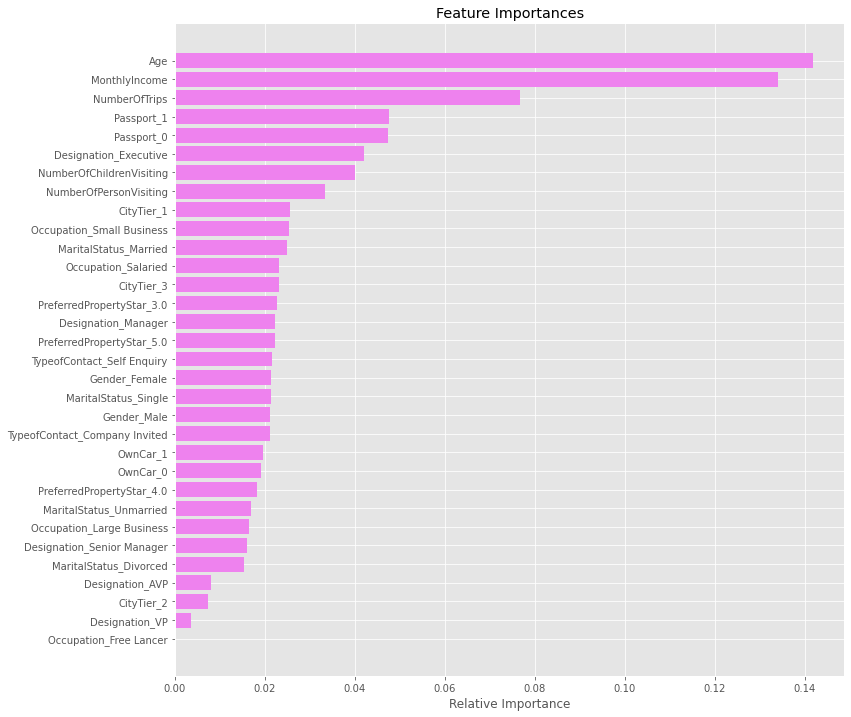

In [95]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [96]:
feature_names = x_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = feature_names).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport_0                     0.106879
Designation_Executive          0.089496
CityTier_3                     0.065390
MaritalStatus_Married          0.043713
Designation_AVP                0.042598
PreferredPropertyStar_5.0      0.041811
Designation_Senior Manager     0.041510
MaritalStatus_Divorced         0.039042
MaritalStatus_Unmarried        0.037108
Designation_Manager            0.035926
Occupation_Large Business      0.035732
MaritalStatus_Single           0.033776
CityTier_1                     0.031527
Occupation_Salaried            0.030273
Age                            0.029708
NumberOfTrips                  0.029568
PreferredPropertyStar_4.0      0.027573
Designation_VP                 0.027309
PreferredPropertyStar_3.0      0.027006
Gender_Female                  0.026909
CityTier_2                     0.026674
TypeofContact_Company Invited  0.024775
OwnCar_0                       0.024207
Occupation_Small Business      0.021688


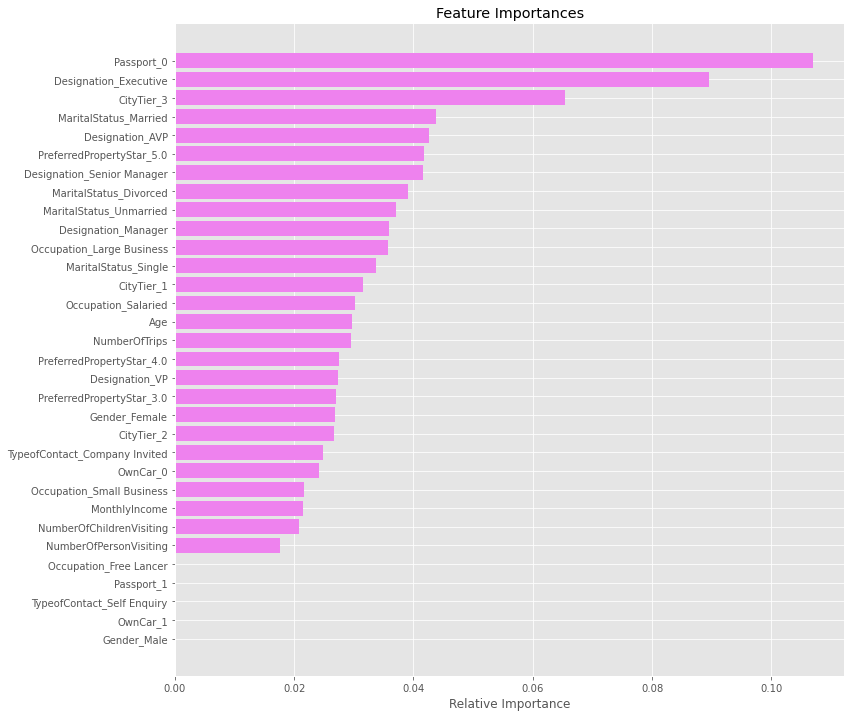

In [97]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:
#### 1. XGBoost model is more generalized with high recall value and no overfitting.
#### 2. Looking at feature importance Passport, Designation , City Tier , martial status,occupation are most important features.Income and Age can also be looked into, few of other models have given higher importance to Income as well.
#### 3. Gender,number of children visiting, having a car seemed to be insignificant.

## Business Recommendations and Key Findings

#### We have built and trained a predictive machine learning model:

#### 1. to identify and predict the customers that have higher chances or interest in buying the tourism package.

#### 2. to recognize the key features of the customers that will influence a customer to purchase the product or not.


#### Most important features that have an impact on Product taken are: 

#### Desgination
#### Passport
#### CityTier
#### Martialstatus
#### Occupation

#### Customers with Designation as Executive and salaried should be targeted by the company for introducing the new package.

#### Customers from City Tier 3 has high chances of buying the new tourism package. Hence, the promotional offers should focus on that particular city as we have seen that customers invited by the company are also likely to purchase the package.

#### Customers with a passport are seen buying packages comparitively more than those who do not package. People with passports maybe  international travellers and focusing on people with passports will help the company to promote the new tourism package.

#### Based on the EDA, mostly single and unmarried customers are buying tourism package followed by married people. The decrease in number of married couples may be due to lack of childcare facilites assuming they have kids. Thereby, we can increase their number by giving them promotional offers or childcare facilities for family with children.

#### Based on EDA, majority of the customers who bought packages earlier preffered 5 star property. Thereby, including these property in the newly introduced package might increase the probability of package being taken.

#### Additionally, customers of age 15-31, monthly income income between 15k and 20k too have chances of pitching the package.

#### In future, based on EDA ,features from a customer interaction data that can expedite the chances of the customer buying the tourism package are:

#### A higher duration of pitch by salesman with the customers.
#### Getting a PitchSatisfactionScore of 3 or 5.
#### Multiple follow ups with the customers.
